# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.080411e+01     7.317615e+00
 * time: 0.0021708011627197266
     1     2.791775e+01     4.668561e+00
 * time: 0.009058952331542969
     2     1.843383e+01     3.987202e+00
 * time: 0.01512598991394043
     3     1.233106e+01     2.502391e+00
 * time: 0.020584821701049805
     4     1.148785e+01     2.542932e+00
 * time: 0.024484872817993164
     5     1.039945e+01     1.900797e+00
 * time: 0.028470993041992188
     6     9.736100e+00     1.367479e+00
 * time: 0.032444000244140625
     7     9.127454e+00     1.105878e+00
 * time: 0.0362398624420166
     8     8.571197e+00     7.296614e-01
 * time: 0.11501479148864746
     9     8.277944e+00     4.340169e-01
 * time: 0.11939382553100586
    10     8.142189e+00     3.493255e-01
 * time: 0.12340092658996582
    11     8.083737e+00     7.263572e-01
 * time: 0.1266188621520996
    12     8.039983e+00     5.957208e-01
 * time: 0.12984299659729004
    13     8.038817e+00     6.091512e-01
 * 

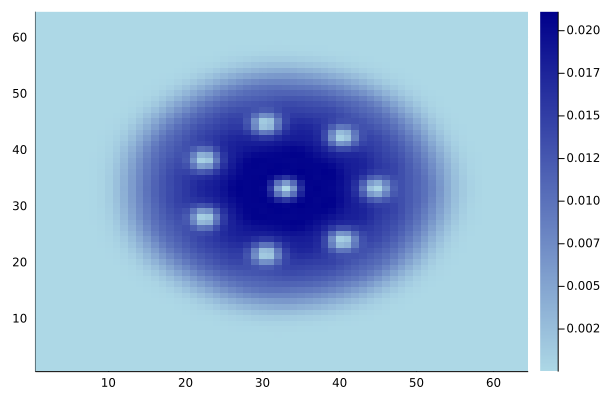

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)